In [1]:
!pip install -q h5py
!pip install -q Pillow
!pip install -q ipyplot

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import os
import h5py
import ipyplot
import numpy as np
from PIL import Image

In [3]:
data = None
base_path = "datasets/demo-chair-with-bg/images/"
filename = "datasets/demo-chair-with-bg/data_chair.hdf5"

In [4]:
# clear the old one
if os.path.exists(filename):
  os.remove(filename)

In [5]:

h5 = h5py.File(filename, "a")

for i in os.listdir(base_path):
  img_path = os.path.join(base_path, i)
  img_name = i.split('.')[0]
  img_pose = img_name.split('_')[1:]
  img_pose = [int(img_pose[0]), int(img_pose[1])]
  print('image:', img_name)
  print('pose:', img_pose)

  # create group by image name
  img_group = h5.create_group(img_name)

  # add image
  img_group.create_dataset('image', data=np.asarray(Image.open(img_path)))

  # add pose
  img_group.create_dataset('pose', data=img_pose)

h5.close()


image: 11c9c57efad0b5ec297936c81e7f6629_28_10
pose: [28, 10]
image: 11c9c57efad0b5ec297936c81e7f6629_12_10
pose: [12, 10]
image: 11c9c57efad0b5ec297936c81e7f6629_34_10
pose: [34, 10]
image: 11c9c57efad0b5ec297936c81e7f6629_10_10
pose: [10, 10]
image: 11c9c57efad0b5ec297936c81e7f6629_4_10
pose: [4, 10]


In [6]:
f = h5py.File(filename, 'r')

In [7]:
# List all groups
keys = list(f.keys())
print("Example keys (sampling first 10-keys): %s\n" % keys[:10])

Example keys (sampling first 10-keys): ['11c9c57efad0b5ec297936c81e7f6629_10_10', '11c9c57efad0b5ec297936c81e7f6629_12_10', '11c9c57efad0b5ec297936c81e7f6629_28_10', '11c9c57efad0b5ec297936c81e7f6629_34_10', '11c9c57efad0b5ec297936c81e7f6629_4_10']



In [8]:
group = f['11c9c57efad0b5ec297936c81e7f6629_4_10']

In [9]:
list(group.keys())

['image', 'pose']

In [10]:
group['pose'][()]

array([ 4, 10])

In [11]:
data = group['image'][()]

In [12]:
# data

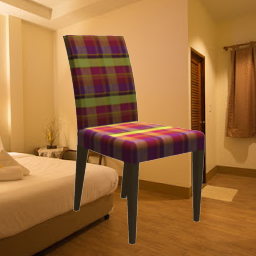

In [13]:
Image.fromarray(data)


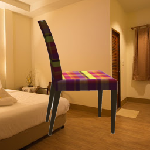
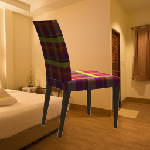
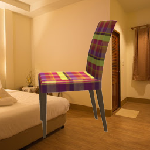
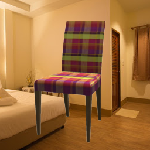
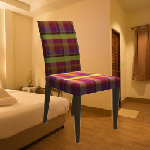


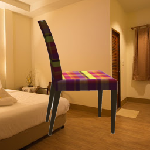
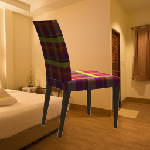
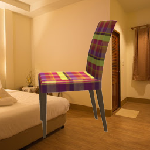
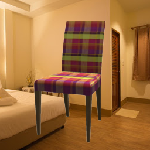
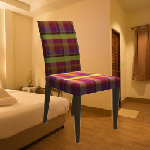

In [14]:
num_img = 200
max_img = num_img
count_img = 0
img_arr = []

for key in keys:
    if count_img == num_img:
        break
        
    each_group = f[key]
    data = each_group['image'][()]
    img_arr.append(data)
    count_img = count_img + 1

ipyplot.plot_images(img_arr, max_images=max_img, img_width=150)

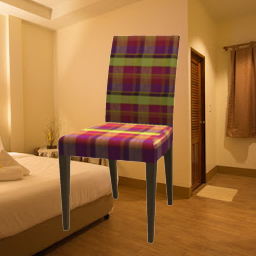

In [15]:
test_group = f['11c9c57efad0b5ec297936c81e7f6629_34_10']
test_data = test_group['image'][()]
Image.fromarray(test_data)

In [16]:
f.close()